<a href="https://colab.research.google.com/github/MahirR199/PredictHomePrice/blob/main/Predicting_California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d camnugent/california-housing-prices


Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 89.1MB/s]


In [2]:
!unzip california-housing-prices.zip


Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [26]:
import pandas as pd

housing_pd = pd.read_csv('housing.csv')
housing_pd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [28]:
housing_pd['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [6]:
housing_pd_shuffled = housing_pd.sample(n=len(housing_pd), random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [35]:
df = pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()
df

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,True,False,False,False,False
2151,False,True,False,False,False
15927,False,False,False,True,False
82,False,False,False,True,False
8161,True,False,False,False,False


In [8]:
housing_pd_shuffled.drop('ocean_proximity', axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [9]:
housing_pd_final = pd.concat([housing_pd_shuffled.drop('ocean_proximity', axis=1),
                              pd.get_dummies(housing_pd_shuffled['ocean_proximity'])], axis=1)

housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,True,False,False,False,False
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,False,True,False,False,False
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,False,False,False,True,False
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,False,False,False,True,False
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,True,False,False,False,False
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,True,False,False,False,False
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,True,False,False,False,False
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,False,True,False,False,False


In [13]:
housing_pd_final = housing_pd_final[['longitude',	'latitude',
                                     'housing_median_age',	'total_rooms',
                                      'total_bedrooms',	'population',
                                      'households',	'median_income',
                                      '<1H OCEAN',
                                      'INLAND', 'ISLAND',
                                      'NEAR BAY',	'NEAR OCEAN', 'median_house_value']]
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,True,False,False,False,False,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,False,True,False,False,False,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,False,False,False,True,False,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,False,False,False,True,False,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,True,False,False,False,False,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,True,False,False,False,False,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,True,False,False,False,False,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,True,False,False,False,False,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,False,True,False,False,False,140700.0


In [14]:
housing_pd_final = housing_pd_final.dropna()
len(housing_pd_final)

20433

In [16]:
train_pd, test_pd, val_pd = housing_pd_final[:18000], housing_pd_final[18000:19217], housing_pd_final[19215:]
len(train_pd), len(test_pd), len(val_pd)

(18000, 1217, 1218)

In [56]:
X_train, y_train = train_pd.to_numpy()[:, :-1], train_pd.to_numpy()[:, -1]
X_val, y_val = val_pd.to_numpy()[:, :-1], val_pd.to_numpy()[:, -1]
X_test, y_test = test_pd.to_numpy()[:, :-1], test_pd.to_numpy()[:, -1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((18000, 13), (18000,), (1218, 13), (1218,), (1217, 13), (1217,))

In [65]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train[:, :8])

def preprocessor(X):
  A = np.copy(X)
  A[:, :8] = scaler.transform(A[:, :8])
  return A

X_train, X_val, X_test = preprocessor(X_train), preprocessor(X_val), preprocessor(X_test)
X_train_preprocessed = preprocessor(X_train)
X_train_preprocessed = np.where(X_train_preprocessed == True, 1,
                        np.where(X_train_preprocessed == False, 0, X_train_preprocessed))
X_train_preprocessed

array([[0.603443377755917, -0.7360730106444799, 0.8208445106254603, ...,
        0, 0, 0],
       [-0.10512186313453206, 0.5371078204618059, 0.6617738240065058,
        ..., 0, 0, 0],
       [-1.422454423663253, 0.9817849489731908, 1.3775919137918011, ...,
        0, 1, 0],
       ...,
       [0.5934635856307015, -0.7313921987654136, -0.6107916689451307,
        ..., 0, 0, 0],
       [1.1273824643298387, -0.7313921987654136, 0.9003798539349376, ...,
        0, 0, 0],
       [0.92279672576288, -0.9420287333234403, -0.6107916689451307, ...,
        0, 0, 0]], dtype=object)

In [66]:
X_train.shape, X_val.shape, X_test.shape

((18000, 13), (1218, 13), (1217, 13))

In [67]:
pd.DataFrame(X_train_preprocessed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.27684,0.328234,-0.326667,1,0,0,0,0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0,1,0,0,0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0,0,0,1,0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.07974,-1.082862,-1.235508,0,0,0,1,0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1,0,0,0,0


<Axes: >

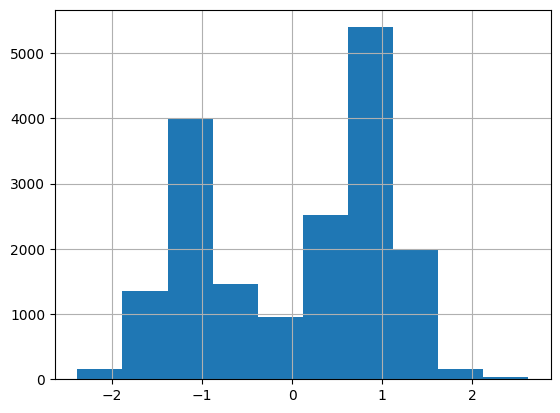

In [68]:
pd.DataFrame(X_train_preprocessed)[0].hist()